In [1]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
# resampling frequency in number of days
freq=2

## preprocessing :
* inference (chlor_a = spatiotemporal + biological)
  * basemap
  * Synthetic Data for inference and variable {mean}
  * Synthetic Data for std {BT}
  * check pair-wise cr, remove redundant?
  * GAM degree < 3, Chap 7 & Chap 1-7
  * BR & GB, $J=1,2,3,4,5,6 (J<6)$, $\lambda$, $d(LOSS)$
    * DB is not applicable here; Loss is based on expected empirical margin error
    * paper & manual
  * RF & BG
    * BG = RF with m=p
  * add prediction maps



             time        id        lat        lon       temp         ve  \
0      2002-07-04     10206  16.229625  66.330375        NaN  13.064500   
1      2002-07-04     10208  13.891875  69.552375        NaN   8.505125   
2      2002-07-04     11089  16.354375  64.683750  27.954125  12.168000   
3      2002-07-04     15703  13.903250  69.583125  28.552250   8.685875   
4      2002-07-04     27069  20.169750  68.737500  29.012000  26.958750   
5      2002-07-04     28842  18.878875  60.694625  27.701750  10.499125   
6      2002-07-04     34159  12.548125  58.914250        NaN  27.354250   
7      2002-07-04     34210   6.476750  56.925000  26.694875  -9.666750   
8      2002-07-04     34211   8.602375  67.929125  28.278000  20.618125   
9      2002-07-04     34212   6.232000  64.750250  28.470750  14.641875   
10     2002-07-04     34708  10.167500  59.691500  27.185500  47.792000   
11     2002-07-04     34710  12.933625  49.905250  30.910625 -34.754625   
12     2002-07-04     347

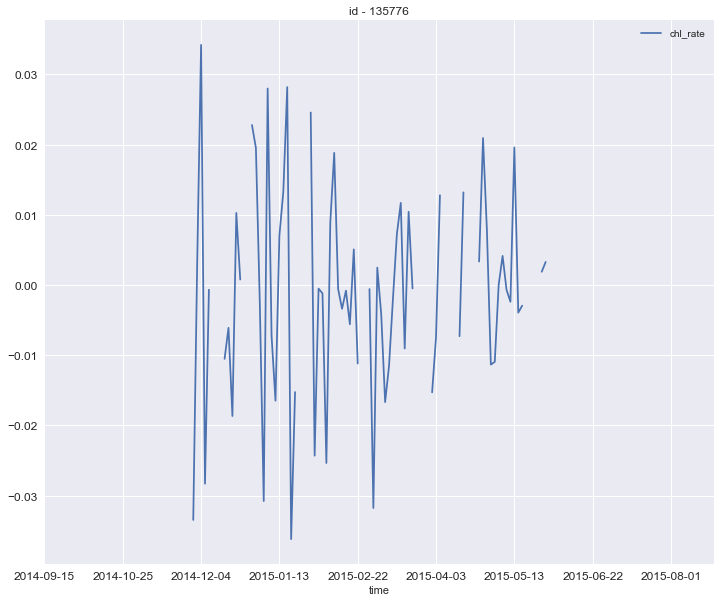

In [3]:
# let's check data quality without float data structure
# load preprocessed float data, and start the interpolation right here!!!!
var7 = "chlrateweekno"
var6 = "sst4"
var5 = "par"
var4 = "t865"
var3 = "kd490"
var2 = "cdm"
var1 = "chl"
vardist = "dist"

indir_prefix = "../data_collector_globcolour/output.data.interpolate/2017GDPfloat/" + "df_Globcolor_"
indir = indir_prefix + var1 + vardist + var2 + var3 + var4 + var5 + var6 + var7 + "_" + str(freq) + "d.csv"

floatDF_tmp = pd.read_csv(indir,index_col=0)
print(floatDF_tmp)


### plot for id 125776, which will be fit by LDS
#plt.figure(figsize=(10,12))
floatDF_tmp[floatDF_tmp.id == 135776].plot(x='time', y ='chl_rate', title=('id - %d' % 135776), figsize=(12,10), fontsize=12 )
plt.show();
plt.close("all")

In [4]:
# https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
# https://stackoverflow.com/questions/16771894/python-nameerror-global-name-file-is-not-defined
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))

from tools import chl_rates  # del(chl_rates)
import importlib
importlib.reload(chl_rates)

<module 'tools.chl_rates' from '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/tools/chl_rates.py'>

In [5]:
print("\n ******* Reduce the Dataset to 'Nov-01 to Mar-31' ******* \n" )
floatsDF_NovMar = chl_rates.reduce_to_NovMar(floatDF_tmp)

# necessary for modification
floatsDF_NovMar.id = floatsDF_NovMar.id.astype(float)

floatsDF_NovMar


 ******* Reduce the Dataset to 'Nov-01 to Mar-31' ******* 

all the data count in [11-01, 03-31]  is  (3932,)


,time,id,lat,lon,temp,ve,vn,spd,var_lat,var_lon,...,sst4,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_week,chl_log_e_rate_week,chl_rate_stand,chl_log_e_rate_stand,week,week_rotate
907,2002-11-01,10206.0,10.737250,67.512250,NaN,-4.832250,6.374250,9.069875,0.000272,0.000719,...,29.292499,-1.921645,-0.005333,-0.035171,-0.037333,-0.246199,-0.011023,-0.138664,44,1
908,2002-11-01,11089.0,14.163375,65.330375,29.059750,-9.491125,6.442875,13.878500,0.000057,0.000106,...,28.683749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1
909,2002-11-01,15707.0,14.197250,68.405375,NaN,-22.495125,1.167000,22.872625,0.000071,0.000140,...,29.338992,-1.861949,NaN,NaN,NaN,NaN,NaN,NaN,44,1
910,2002-11-01,34315.0,6.824250,58.284375,29.299375,11.405750,-34.943250,39.244250,0.000045,0.000081,...,28.621874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1
911,2002-11-01,34710.0,16.764500,63.115250,29.013125,0.536625,14.745500,15.588375,0.000062,0.000119,...,27.504999,-0.967747,0.023261,0.065307,0.162824,0.457150,0.019548,0.369692,44,1
912,2002-11-01,34721.0,12.577000,67.553000,29.335125,1.065000,7.905750,10.247000,0.000066,0.000125,...,29.138749,-1.702484,0.020277,0.125864,0.141940,0.881048,0.016359,0.676070,44,1
913,2002-11-03,10206.0,10.818500,67.399375,NaN,-8.207500,7.311375,12.395125,0.000295,0.000778,...,28.825901,-2.134598,-0.014037,-0.106476,-0.098258,-0.745333,-0.020329,-0.499421,44,1
914,2002-11-03,11089.0,14.247750,65.189625,28.986625,-9.065625,4.137875,12.149875,0.000060,0.000116,...,28.817188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1
915,2002-11-03,15707.0,14.162000,68.048125,NaN,-21.659125,-5.021500,22.922125,0.000074,0.000144,...,28.937047,-1.890368,-0.002177,-0.014210,-0.015237,-0.099467,-0.007648,-0.032612,44,1
916,2002-11-03,34315.0,6.310750,58.277125,29.485250,-7.001500,-29.505125,30.616000,0.000054,0.000099,...,28.617658,-2.041916,NaN,NaN,NaN,NaN,NaN,NaN,44,1


In [6]:
# check the float data [done]
# think about the data structure...

In [9]:
# check nan values in the spatial-temporal info
print("---------------------------------------")
print("sampling freq: "+ str(freq) + "D")
print("length of series: ", len(floatsDF_NovMar.chlor_a))
print("---------------------------------------")
cols = floatsDF_NovMar.columns.values
for col in cols:
    print("count of nans in " + col + ":" + str(floatsDF_NovMar[col].isnull().sum()) )

---------------------------------------
sampling freq: 2D
length of series:  5903
---------------------------------------
count of nans in time:0
count of nans in id:0
count of nans in lat:0
count of nans in lon:0
count of nans in temp:315
count of nans in ve:39
count of nans in vn:39
count of nans in spd:39
count of nans in var_lat:0
count of nans in var_lon:0
count of nans in var_tmp:0
count of nans in chlor_a:1240
count of nans in dist:0
count of nans in cdm:1601
count of nans in kd490:1268
count of nans in t865:1274
count of nans in par:1
count of nans in sst4:195
count of nans in chlor_a_log_e:1240
count of nans in chl_rate:1971
count of nans in chl_log_e_rate:1971
count of nans in chl_rate_week:1971
count of nans in chl_log_e_rate_week:1971
count of nans in chl_rate_stand:1971
count of nans in chl_log_e_rate_stand:1971
count of nans in week:0
count of nans in week_rotate:0


In [10]:
# dropna by default drops any row containing a missing value
# drop uncessary variables
# drop {'temp'}  => sst4
# drop {'ve', 'vn', 'spd'}
# drop {'var_lat', 'var_lon', 'var_tmp'}
# drop {'chlor_a'}
# drop {'chlor_a_log_e', 'chl_log_e_rate',
#       'chl_rate_week', 'chl_log_e_rate_week'
#       'chl_rate_stand', 'chl_log_e_rate_stand'}
# drop {'week'}       
col_listLDS_final = ['time', 'id', 'lat', 'lon', 've', 'vn', 'spd',   
                     'dist', 'cdm', 'kd490', 't865',
                     'par', 'sst4', 'chlor_a', 'week_rotate']
floatsDF_NovMarInference = floatsDF_NovMar[col_listLDS_final].dropna()
# check nan values in the spatial-temporal info
print("---------------------------------------")
print("sampling freq: "+ str(freq) + "D")
print("length of series: ", len(floatsDF_NovMarInference.chlor_a))
print("---------------------------------------")
cols = floatsDF_NovMarInference.columns.values
for col in cols:
    print("count of nans in " + col + ":" + str(floatsDF_NovMarInference[col].isnull().sum()) )

---------------------------------------
sampling freq: 2D
length of series:  4148
---------------------------------------
count of nans in time:0
count of nans in id:0
count of nans in lat:0
count of nans in lon:0
count of nans in ve:0
count of nans in vn:0
count of nans in spd:0
count of nans in dist:0
count of nans in cdm:0
count of nans in kd490:0
count of nans in t865:0
count of nans in par:0
count of nans in sst4:0
count of nans in chlor_a:0
count of nans in week_rotate:0


In [11]:
# save the data and printout
print(floatsDF_NovMarInference)
outpath = "../data/" + "floatsDF_list_final_" + "inference_chlora_"+ str(freq) + "d.csv"
floatsDF_NovMarInference.to_csv(outpath, sep=',')
test = pd.read_csv(outpath)
print("------------------")
print("------------------")
print("------------------")
print(test)

             time          id        lat        lon         ve         vn  \
907    2002-11-01     10206.0  10.737250  67.512250  -4.832250   6.374250   
909    2002-11-01     15707.0  14.197250  68.405375 -22.495125   1.167000   
911    2002-11-01     34710.0  16.764500  63.115250   0.536625  14.745500   
912    2002-11-01     34721.0  12.577000  67.553000   1.065000   7.905750   
913    2002-11-03     10206.0  10.818500  67.399375  -8.207500   7.311375   
915    2002-11-03     15707.0  14.162000  68.048125 -21.659125  -5.021500   
916    2002-11-03     34315.0   6.310750  58.277125  -7.001500 -29.505125   
917    2002-11-03     34710.0  16.965375  63.133750   2.729500  11.047250   
918    2002-11-03     34721.0  12.647250  67.570000   3.303000   2.865500   
919    2002-11-05     10206.0  10.902250  67.291000  -7.410625   5.807000   
920    2002-11-05     11089.0  14.298875  65.041250 -10.529750   4.507125   
921    2002-11-05     15707.0  14.019875  67.721875 -19.399000 -13.877625   